In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#to display all columns in the dataset
pd.pandas.set_option('display.max_columns',None)

### 1. Merge the datasets Customers, Product_Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done Transactions with us and select the join type accordingly.

In [3]:
# importing the data

Customers = pd.read_csv("Customer.csv")

Product_Hierarchy = pd.read_csv("prod_cat_info.csv")

Transactions = pd.read_csv("Transactions.csv")

In [118]:
# displaying top few rows of customers data

Customers.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [119]:
# displaying top few rows of Product_Hierarchy data

Product_Hierarchy.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [120]:
# displaying top few rows of Transactions data

Transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [121]:
# merging all 3 datasets to create Final_data

Cust = pd.merge(left = Customers, right = Transactions, left_on = "customer_Id", right_on = "cust_id", how="inner")
Customer_Final = pd.merge(left = Cust, right = Product_Hierarchy, left_on = ["prod_cat_code","prod_subcat_code"], right_on = ["prod_cat_code","prod_sub_cat_code"], how="inner")

In [122]:
# displaying top few rows of Final_data

Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction


### 2. prepare a summary report for the merged dataset
   
#### a. Get the column names and their corrosponding datatypes

In [123]:
# displaying column names and their respective data types

Customer_Final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [124]:
# we can see that "DOB" & "tran_date" are having mismatched data type
# hence will convert their data types into appropriate data type

In [125]:
Customer_Final["DOB"] = pd.to_datetime(Customer_Final.DOB)
Customer_Final["tran_date"] = pd.to_datetime(Customer_Final.tran_date)

In [126]:
# displaying top few rows

Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction


In [127]:
# # displaying column names with their appropriate data types

Customer_Final.dtypes

customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
dtype: object

#### b. Top/Bottom 10 observations

In [128]:
Top10 = Customer_Final.head(10)

In [129]:
# displaying top 10 observations

Top10

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
5,274630,1970-01-02,M,4.0,78357345891,274630,2012-11-04,7,5,1,646,67.830,713.830,TeleShop,Books,7,Fiction
6,273541,1970-01-02,M,4.0,23916816961,273541,2013-09-02,7,5,4,410,172.200,1812.200,e-Shop,Books,7,Fiction
7,269008,1970-02-13,F,6.0,35560569829,269008,2013-09-03,7,5,1,1441,151.305,1592.305,e-Shop,Books,7,Fiction
8,269008,1970-02-13,F,6.0,94033312891,269008,2012-04-26,7,5,5,746,391.650,4121.650,MBR,Books,7,Fiction
9,267199,1970-02-14,NaN,2.0,56749259881,267199,2012-11-01,7,5,4,1049,440.580,4636.580,MBR,Books,7,Fiction


In [130]:
Bottom10 = Customer_Final.tail(10)

In [131]:
# displaying bottom 10 observations

Bottom10

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,268914,1992-11-15,F,3.0,1407823655,268914,2011-10-06,10,5,1,1252,131.460,1383.460,MBR,Books,10,Non-Fiction
23044,269519,1992-11-17,M,9.0,29719500605,269519,2013-12-24,10,5,4,1036,435.120,4579.120,TeleShop,Books,10,Non-Fiction
23045,273524,1992-11-25,F,1.0,25762805863,273524,2012-11-19,10,5,1,1401,147.105,1548.105,Flagship store,Books,10,Non-Fiction
23046,272141,1992-02-12,F,10.0,71337087467,272141,2012-07-22,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,10,Non-Fiction
23047,272141,1992-02-12,F,10.0,71337087467,272141,2012-07-16,10,5,3,1422,447.930,4713.930,e-Shop,Books,10,Non-Fiction
23048,267812,1992-04-12,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,1992-09-12,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction
23052,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-26,10,5,4,1408,591.360,6223.360,e-Shop,Books,10,Non-Fiction


#### c. "Five number summary" for continuous variables (min, Q1, median, Q3, max)

In [132]:
# fivenumber summary for continuous variables

Customer_Final.describe()

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
count,23053.000000,23045.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271021.746497,5.482534,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,6.149091
std,2431.692059,2.863499,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,3.726372
min,266783.000000,1.000000,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,268935.000000,3.000000,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,270980.000000,5.000000,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000
75%,273114.000000,8.000000,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,10.000000
max,275265.000000,10.000000,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000


#### d. Frequency tables for all the categorical variables

In [133]:
# categorical variables

categorical_features = [feature for feature in Customer_Final.columns if Customer_Final[feature].dtype=="O"]
print("categorical variables count {}".format(len(categorical_features)))

categorical variables count 4


In [134]:
# displaying the top 10 rows of data with categorical variables

Customer_Final[categorical_features].head(10)

,Gender,Store_type,prod_cat,prod_subcat
0,M,TeleShop,Books,Fiction
1,M,e-Shop,Books,Fiction
2,F,Flagship store,Books,Fiction
3,F,e-Shop,Books,Fiction
4,F,e-Shop,Books,Fiction
5,M,TeleShop,Books,Fiction
6,M,e-Shop,Books,Fiction
7,F,e-Shop,Books,Fiction
8,F,MBR,Books,Fiction
9,NaN,MBR,Books,Fiction


In [135]:
# frequency table for categorical variables

Customer_Final[categorical_features].describe()

,Gender,Store_type,prod_cat,prod_subcat
count,23044,23053,23053,23053
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,11811,9311,6069,3048


### 3. Generate Histograms for all continuous variables and frequency bars for categorical variables

In [136]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction


In [137]:
# numerical variables

numerical_features = [feature for feature in Customer_Final.columns if Customer_Final[feature].dtype!="O" and feature not in ["DOB","tran_date"]]

In [138]:
# list of numerical variables

numerical_features

['customer_Id',
 'city_code',
 'transaction_id',
 'cust_id',
 'prod_subcat_code',
 'prod_cat_code',
 'Qty',
 'Rate',
 'Tax',
 'total_amt',
 'prod_sub_cat_code']

In [139]:
# displaying top few rows of data with numerical variables

Customer_Final[numerical_features].head()

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
0,268408,4.0,87243835584,268408,7,5,5,187,98.175,1033.175,7
1,275152,4.0,73109425404,275152,7,5,2,464,97.440,1025.440,7
2,275034,4.0,64777271023,275034,7,5,2,197,41.370,435.370,7
3,270829,8.0,87174343938,270829,7,5,4,1141,479.220,5043.220,7
4,267657,7.0,76242744953,267657,7,5,4,1020,428.400,4508.400,7


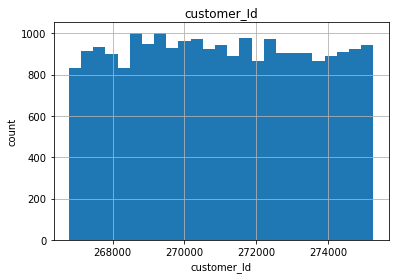

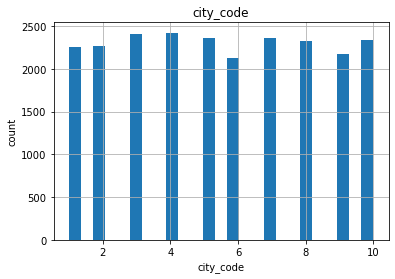

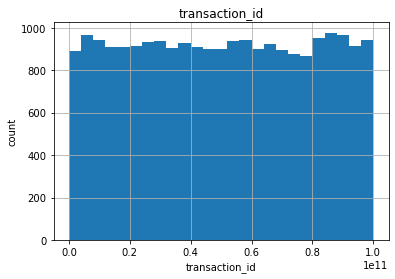

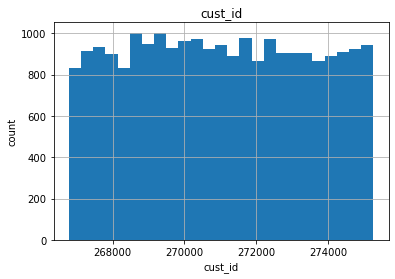

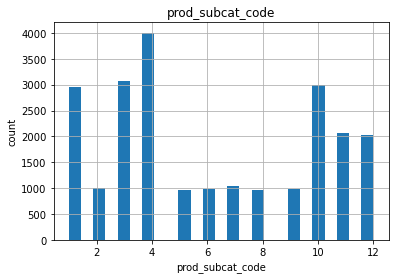

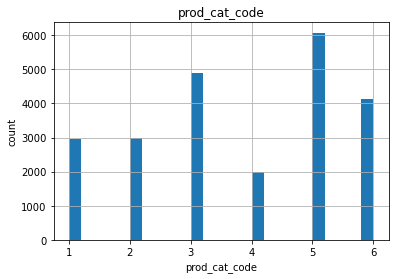

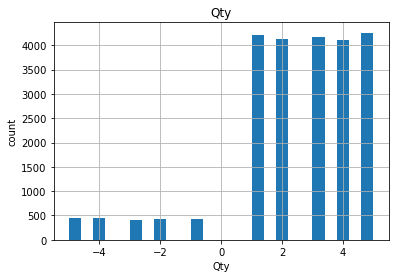

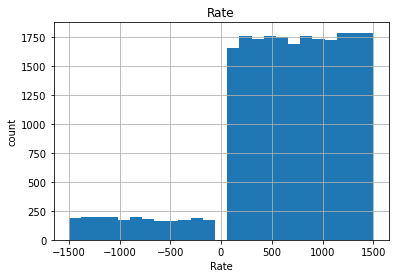

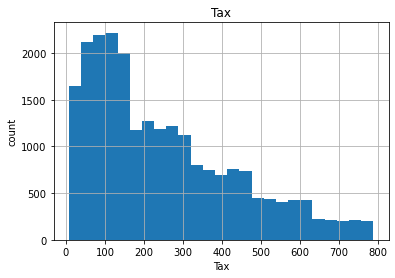

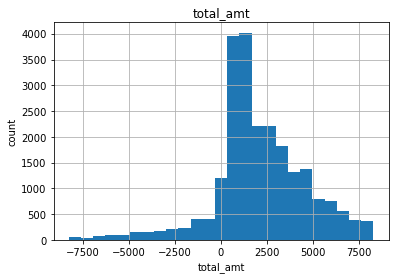

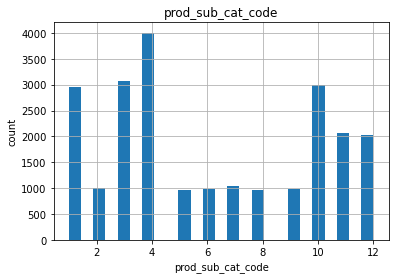

In [140]:
# generating histograms for numerical variables

for feature in numerical_features:
    data = Customer_Final.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

In [141]:
# list of categorical variables

categorical_features

['Gender', 'Store_type', 'prod_cat', 'prod_subcat']

In [142]:
# displaying top few rows of data with categorical variables

Customer_Final[categorical_features].head()

,Gender,Store_type,prod_cat,prod_subcat
0,M,TeleShop,Books,Fiction
1,M,e-Shop,Books,Fiction
2,F,Flagship store,Books,Fiction
3,F,e-Shop,Books,Fiction
4,F,e-Shop,Books,Fiction


In [143]:
list(enumerate(categorical_features))

[(0, 'Gender'), (1, 'Store_type'), (2, 'prod_cat'), (3, 'prod_subcat')]

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PANDA\anaconda3\lib\si

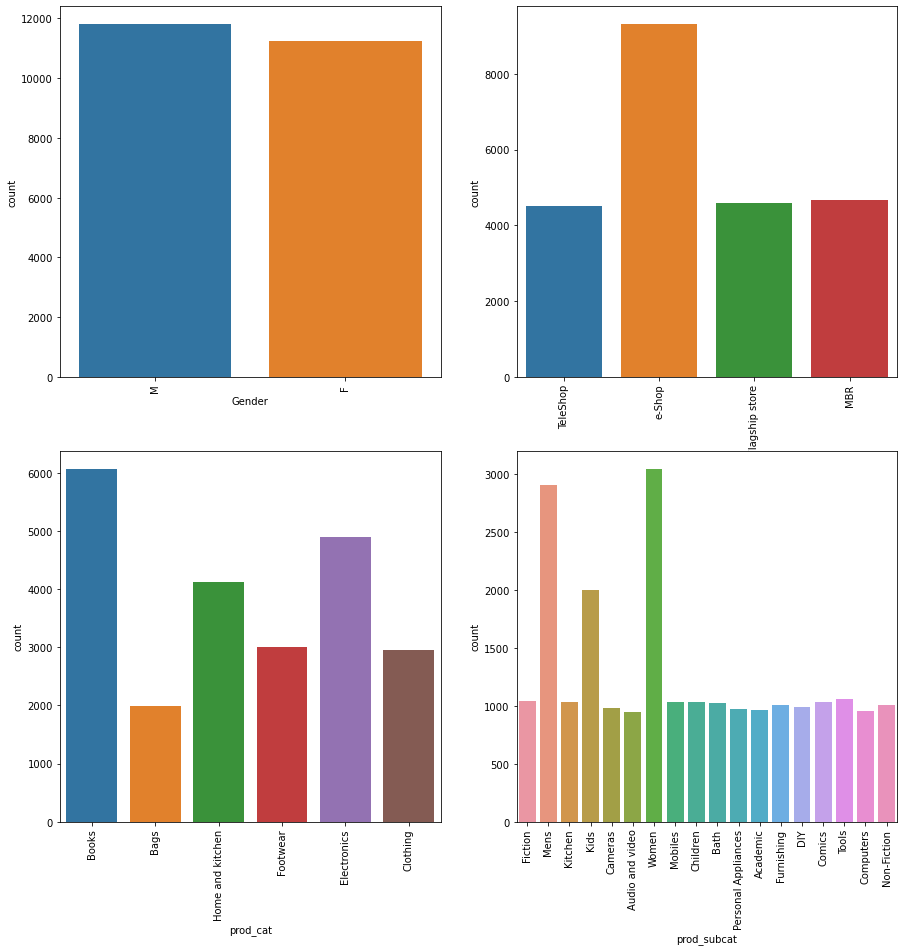

In [144]:
# generating frequency bars for categorical variables

plt.figure(figsize=(15,15))
for i in enumerate(categorical_features):
    plt.subplot(2,2,i[0]+1)
    sns.countplot(i[1], data = Customer_Final)
    plt.xticks(rotation = 90)

### 4. Calculate the following using the merged dataset:
   
#### a. Time period of the available trasaction data

In [145]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction


In [146]:
# to get the time period of the data will first find out maximum and miminum dates of "tran_date"

# maximumn data
max_date = Customer_Final["tran_date"].max()

# minimum data
min_date = Customer_Final["tran_date"].min()

In [147]:
# time range of the "tran_date" (older date to recent date)

print("Time period is "+ pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

Time period is 02-01-2011 to 02-12-2014


In [148]:
# time period of the in terms of years, month and days

print("Time period of the data is", max_date.year - min_date.year, "years", max_date.month - min_date.month , "months", max_date.day - min_date.day , "days")

Time period of the data is 3 years 11 months 0 days


#### b. count of trasaction id where the total amount of transaction was negative

In [149]:
count_of_trans_id = Customer_Final.transaction_id[(Customer_Final.total_amt<0)].count()

In [150]:
print("The count of transaction id where the total amount of transaction was negative is {}".format(count_of_trans_id))

The count of transaction id where the total amount of transaction was negative is 2177


### 5. Analyse which product categories are more popular among females vs male customer?

In [151]:
# finding count of female customers

Customer_Final["Female_count"] = Customer_Final.Gender[(Customer_Final.Gender=="F")].count()

# finding count of male customers

Customer_Final["Male_count"] = Customer_Final.Gender[(Customer_Final.Gender=="M")].count()

In [152]:
# count of customers with respect to product category

Customer_Final[["prod_cat","Female_count","Male_count"]].groupby(["prod_cat"]).count()

,Female_count,Male_count
prod_cat,,
Bags,1998,1998
Books,6069,6069
Clothing,2960,2960
Electronics,4898,4898
Footwear,2999,2999
Home and kitchen,4129,4129


### 6. Which city code has the maximum customers and what was the percentage customers from that city

In [153]:
df = Customer_Final[["city_code", "customer_Id"]].groupby(["city_code"]).count()

In [154]:
# count of customers for each city

df

,customer_Id
city_code,
1.0,2258
2.0,2270
3.0,2411
4.0,2422
5.0,2360
6.0,2127
7.0,2356
8.0,2330
9.0,2178


In [165]:
# finding the percentage of the customers from that city

no_of_total_cust = df.customer_Id.sum()

df["percentage_of_customers"] = (df.customer_Id/no_of_total_cust)*100

Top_city_code = df.sort_values(by="customer_Id",ascending=False).head(1)

Top_city_code

,customer_Id,percentage_of_customers
city_code,,
4.0,2422,10.509872


In [166]:
# city_code 4.0 has the maximum customers which is 2422 and percentage of the customers in that city is 10.509872 %

### 7. Which store type sells the maximum products by value and by quantity?

In [187]:
# by product value

Customer_Final[["Store_type","Rate"]].groupby(["Store_type"]).sum().sort_values(by="Rate", ascending=False).head(1)

,Rate
Store_type,
e-Shop,5941001


In [188]:
# we can see that the store_type "e-Shop" sells the maximum products by value

In [189]:
# by product quantity

Customer_Final[["Store_type","Qty"]].groupby("Store_type").sum().sort_values(by="Qty", ascending=False).head(1)

,Qty
Store_type,
e-Shop,22763


In [190]:
# we can see that the store_type "e-Shop" sells the maximum products by quantity

### 8. What was the total amount earned from the "Electronics" and "Clothing" catogery from flagship store

- method-1 

In [214]:
total_earning1 = Customer_Final.total_amt[((Customer_Final.prod_cat=="Electronics") | (Customer_Final.prod_cat=="Clothing")) & (Customer_Final.Store_type=="Flagship store")].sum() 

In [215]:
print("Total amount earned is {}".format(total_earning1))

Total amount earned is 3409559.27


- method-2 (using pivot table)

In [216]:
df = Customer_Final.pivot_table(index="prod_cat", columns="Store_type", values="total_amt", aggfunc="sum")

In [217]:
total_earning2 = round(df.loc[["Clothing","Electronics"],"Flagship store"].sum(),2)

In [218]:
print("Total amount earned is {}".format(total_earning2))

Total amount earned is 3409559.27


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

- method-1

In [227]:
total_earn1 = Customer_Final.total_amt[(Customer_Final.Gender=="M") & (Customer_Final.prod_cat=="Electronics")].sum()

In [228]:
print("Total amount earned is {}".format(total_earn1))

Total amount earned is 5703109.425


- method-2 (using pivot table)

In [226]:
df = Customer_Final.pivot_table(index="Gender", columns="prod_cat", values="total_amt", aggfunc="sum")

In [234]:
total_earn2 = round(df.loc["M","Electronics"],3)

In [235]:
print("Total amount earned is {}".format(total_earn2))

Total amount earned is 5703109.425


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [312]:
cust_df = Customer_Final[Customer_Final.total_amt>0]

unique_trans = cust_df[["customer_Id","transaction_id"]].groupby(["customer_Id"]).nunique()

unique_trans[unique_trans.transaction_id>10]

,transaction_id
customer_Id,
266794,11
270535,11
270803,11
272741,11
273014,11
274227,11


In [311]:
# we can see that total 6 customers have more than 10 unique transactions

### 11. For all customers aged between 25 to 35, find out

#### a. What was the total amount spent for "Electronics" & "Books" product categories

In [300]:
# to get age of each customers will create a new varable "Age" by substracting "DOB" from today's date

# to get today's date

import datetime as dt
from datetime import date

today = date.today()

# taking "DOB"

dob = Customer_Final.DOB

In [306]:
Customer_Final["Age"] = today.year - dob.dt.year

In [310]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,Female_count,Male_count,Age
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction,11233,11811,51
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction,11233,11811,51
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction,11233,11811,51
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction,11233,11811,51
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction,11233,11811,51


In [315]:
# data of customers aged between 25 to 35

cust_age = Customer_Final[Customer_Final.Age.between(25,35)]

In [329]:
total_spend = cust_age.total_amt[cust_age.prod_cat.isin(["Electronics","Books"])].sum()

In [331]:
print("Total amount spent is {}".format(total_spend))

Total amount spent is 7041794.825


#### b. What was the total amount spent by these customers between 1st jan 2014 to 1st march 2014

In [347]:
total_spend = round(cust_age.total_amt[cust_age.tran_date.between("2014-01-01", "2014-03-01")].sum(),3)

In [348]:
print("Total amount spent is {}".format(total_spend))

Total amount spent is 495898.585
